# PharmSci 175/275 (UCI)
## What is this?? 
The material below is an instructional session/lecture on docking, scoring and pose prediction from Drug Discovery Computing Techniques, PharmSci 175/275 at UC Irvine. 
Extensive materials for this course, as well as extensive background and related materials, are available on the course GitHub repository: [github.com/mobleylab/drug-computing](https://github.com/mobleylab/drug-computing)

This material is a set of slides intended for presentation with RISE as detailed [in the course materials on GitHub](https://github.com/MobleyLab/drug-computing/tree/master/uci-pharmsci/lectures/energy_minimization). While it may be useful without RISE, it will also likely appear somewhat less verbose than it would if it were intended for use in written form.

# Molecules, 3D structure, and shape

Today: Docking and scoring, pose prediction, etc.

### Instructor: David L. Mobley

### Contributors to today's materials:
- David L. Mobley

# Drug discovery is often partly about finding inhibitors, as these can make good drugs

<center><img src="images/BCLXL_peptide.png" alt="GitHub" style="width: 600px;"/></center>
Anticancer target BCL-XL; green (part of larger protein) and gray bind; goal: Free up green to perform important function in apoptosis, so need something else which binds this cleft.

(Fesik et al., Nature Reviews: Cancer, 5:876; Oltersdorf et al., Nature 435:677)

## Small molecules can mimic binding partners


<center><img src="images/BCLXL_ligand.png" alt="GitHub" style="width: 600px;"/></center>
Here, a green compound binds in the same cleft; potential anti-cancer drug.

(Fesik et al., Nature Reviews: Cancer, 5:876; Oltersdorf et al., Nature 435:677)

In [34]:
from IPython.display import HTML

$\Delta G = -k_B T \frac{\ln Q_{PL}}{Q_P Q_L}$

In [35]:
%%HTML
<video autoplay width='400'>
  <source src="images/IL2_complex-5-104.mov" type="video/quicktime">
</video>
<video autoplay width='400'>
  <source src="images/IL2_protein-5-106.mov" type="video/quicktime">
</video>
<video autoplay width='400'>
  <source src="images/IL2_ligand-5-108.mov" type="video/quicktime">
</video>


Binding free energy involves a weighted sum over all the relevant configurations of the systems involved.

## Docking treats binding mode and score as separate problems, requires thinking of binding modes as single orientations/placements

Instead of $\Delta G = \Delta H - T\Delta S$, docking usually takes $\Delta G \approx \Delta H$:
- Score $\approx \Delta H$
- Sometimes adds $-\Delta G_{solv}$
- Uses "optimal" single orientations

<center><img src="images/binding.png" alt="binding" style="width: 600px;"/></center>

# Virtual screening provides the computational alternative to experimental high-throughput screening

<center><img src="https://media.nature.com/lw926/nature-assets/nature/journal/v432/n7019/images/nature03197-f2.2.jpg" alt="screening" style="width: 900px;"/></center>

(Shoichet, Nature 432:862 (2004))

## Virtual screening has different strengths and weaknesses

<p float="left">

<img  align="left" src="https://media.nature.com/lw926/nature-assets/nature/journal/v432/n7019/images/nature03197-f2.2.jpg" alt="screening" style="width: 400px;"/> 
</p>
- false negatives and false positives are different, at (probably) higher rates
- Requires experimental confirmation
- Strengths: New chemistry, new compounds. 
  - Different hits
  - Fast
  - Perhaps higher hit rates?

## Docking scores are somewhat arbitrary
- Convention: Lower score is better (like free energy/enthalpy of binding)
- Docking scores don't predict binding affinity (see e.g. work of Warren et al., J Med Chem).
- Usually they have a somewhat arbitrary scale, aren't really energies
- Some programs assign energy units and attempt to scale to correct range (but probably not trustworthy)

### So it's not uncommon to see scores that are driven by choice of receptor

<p float="right">
<img  align="right" src="images/rec1.png" alt="screening" style="width: 100px;"/> 
<img  align="right" src="images/rec2.png" alt="screening" style="width: 100px;"/> 
</p>

Populating the interactive namespace from numpy and matplotlib


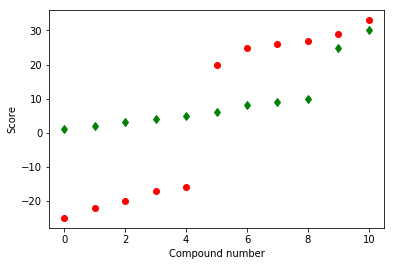

In [43]:
rec1_scores = [-25, -22, -20, -17, -16, 20, 25, 26, 27, 29, 33]
rec2_scores = [  1,   2,    3,  4,   5,  6,  8,  9, 10,  25, 30 ]
%pylab inline
plot(rec1_scores, 'ro')
plot(rec2_scores, 'gd')
ylabel('Score'), xlabel('Compound number')
show()

### So don't use docking to try and predict the receptor
- Score scales are arbitrary
- Score zeros are arbitrary
- Score range/scale depends on receptor, so don't compare scores across receptors or across mutants of a single receptor

## Several major classes of scoring function see common use
- Force field-based: Use similar FFs to molecular dynamics, perhaps with empirical modifications (e.g. D-Score, G-Score, GOLD, AutoDock, DOCK, ...)
- Knowledge-based: Use statistical potentials (PMF, SMoG, DrugScore, ...)
- Empirical: Fitted to reproduce particular properties (LUDI, F-Score, ChemScore, SCORE, Fresno, X-Score, GLIDE (?))
- Conensus scoring: Combine multiple approaches in a "voting" type way, e.g. take top hits from several methods
(see e.g. Kitchen et al., NRDD 3:935 (2004))

There is no single best approach; all have strengths and weaknesses and success will depend on target.



## Docking is best understood as a good filtering tool

It works well for filtering out compounds that simply cannot fit in a binding site, or are likely to have very poor interactions there.
It is not a reliable predictor of potent compounds.

So, for example, we might see:

Populating the interactive namespace from numpy and matplotlib


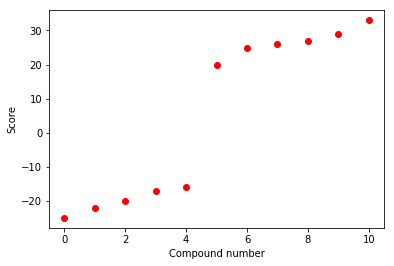

In [44]:
rec1_scores = [-25, -22, -20, -17, -16, 20, 25, 26, 27, 29, 33]
%pylab inline
plot(rec1_scores, 'ro')
ylabel('Score'), xlabel('Compound number')
show()

We would then likely filter out compounds with the least favorable scores (above 10) and be interested in the rest.
(In reality we would do this on far more compounds).

## Docking performs poorly at binding strength prediction: It's just not designed to do that

- docking can't reliably calculate binding strength, or even relative binding strengths
- see Warren et al, JMC. 49:5912 (2005) (data plotted here is from SI); also Velec et al., JMC. 48:6296 (2005),  Huang et al., JMC. 49:6789 (2006)


<p float="left">
<img  align="left" src="images/Warren_example_data.png" alt="screening" style="width: 700px;"/> 
</p>




# (Need to continue converting slides to Jupyter notebook format here)